# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [1]:
import pandas as pd
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [2]:
sales[sales['sales'] > 10]
sales.query('sales > 10')

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [3]:
sales[sales['year'] == 2018]
sales.query('year == 2018')

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [4]:
sales.query('sales > 13 and year == 2018')

,employee,sales,year
0,Katrina,14,2018


In [5]:
sales.query('not sales > 13 and not year == 2018')

,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [6]:
sales.query("(sales / 3) > 3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [8]:
sales_sorted = sales.sort_values('employee')
sales_sorted

,employee,sales,year
7,Alaina,15,2020
8,Egweyn,5,2020
6,Esperanza,7,2019
1,Guanyu,17,2019
4,Jacqueline,8,2020
2,Jan,6,2020
0,Katrina,14,2018
5,Paola,3,2019
3,Roman,12,2018


In [ ]:
reset_index = sales_sorted.reset_index()
reset_index

,index,employee,sales,year
0,7,Alaina,15,2020
1,8,Egweyn,5,2020
2,6,Esperanza,7,2019
3,1,Guanyu,17,2019
4,4,Jacqueline,8,2020
5,2,Jan,6,2020
6,0,Katrina,14,2018
7,5,Paola,3,2019
8,3,Roman,12,2018


In [ ]:
reset_index.drop(columns='index', axis=1)

,employee,sales,year
0,Alaina,15,2020
1,Egweyn,5,2020
2,Esperanza,7,2019
3,Guanyu,17,2019
4,Jacqueline,8,2020
5,Jan,6,2020
6,Katrina,14,2018
7,Paola,3,2019
8,Roman,12,2018


In [20]:
for i in range(len(sales_sorted)):
    if i > 5:
        print(sales_sorted.iloc[i])

employee    Katrina
sales            14
year           2018
Name: 0, dtype: object
employee    Paola
sales           3
year         2019
Name: 5, dtype: object
employee    Roman
sales          12
year         2018
Name: 3, dtype: object


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
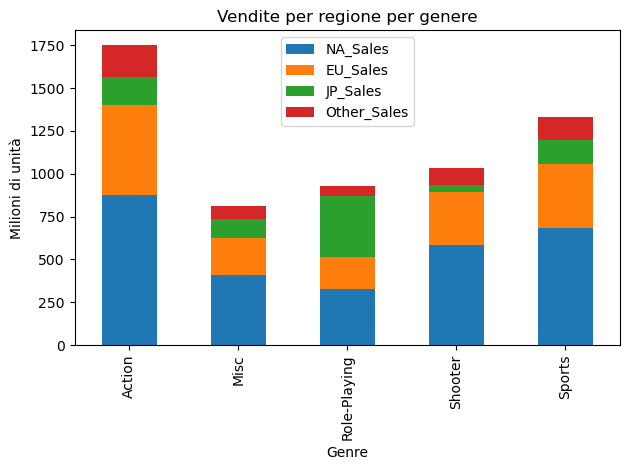


In [11]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# 1
unique_names = df['Name'].drop_duplicates()
len(unique_names)

11493

In [ ]:
# 2
unique_genre = df['Genre'].drop_duplicates()
len(unique_genre)

12

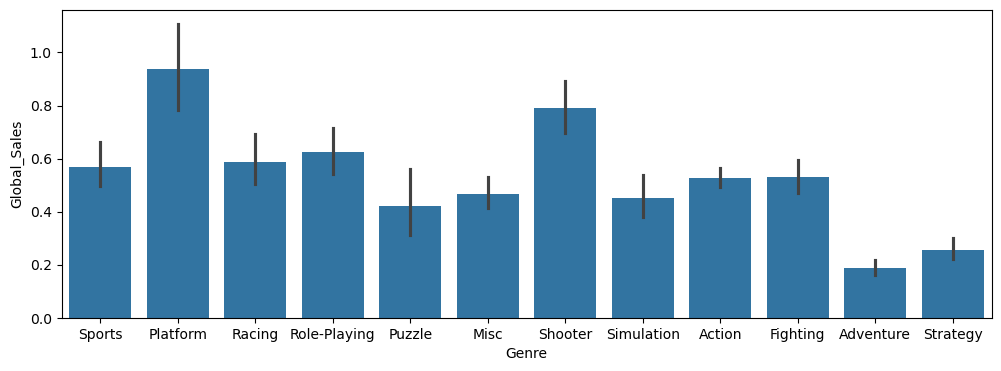

In [14]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Genre', y='Global_Sales')
plt.show()

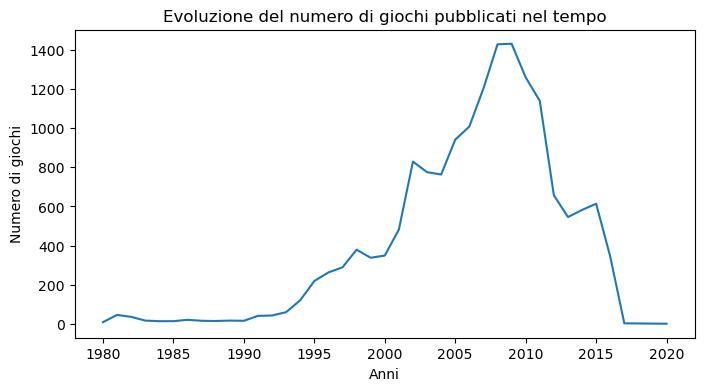

In [ ]:
# 3
evo = df.groupby('Year')['Name'].count()
plt.figure(figsize=(8,4))
plt.plot(evo)
plt.title('Evoluzione del numero di giochi pubblicati nel tempo')
plt.xlabel('Anni')
plt.ylabel('Numero di giochi')
plt.show()


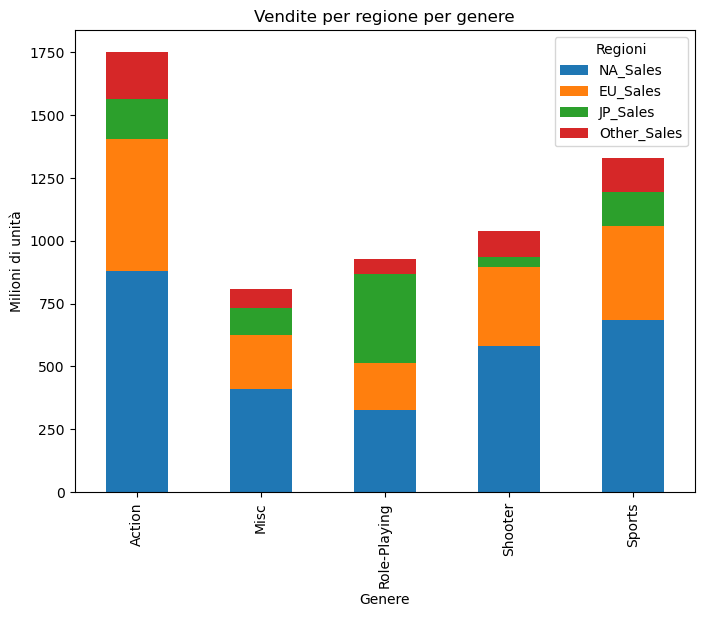

In [16]:
genres = ["Action", "Misc", "Role-Playing", "Shooter", "Sports"]
df_filtered = df[df["Genre"].isin(genres)]

sales_by_genre = df_filtered.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

sales_by_genre.plot(kind="bar", stacked=True, figsize=(8,6))

plt.title("Vendite per regione per genere")
plt.xlabel("Genere")
plt.ylabel("Milioni di unità")
plt.legend(title="Regioni")
plt.show()